In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\nasod\Downloads\CountyWeather_Data_By_Month.csv')

In [8]:
print(df.head())

                            County Month  Year  Average Temp  Min Temp  \
0  National (contiguous 48 States)  Jan.  1940          23.8      14.1   
1                          Indiana  Jan.  1940          14.1       5.5   
2                     Adams County  Jan.  1940          12.8       5.3   
3                     Allen County  Jan.  1940          13.2       5.6   
4               Bartholomew County  Jan.  1940          15.4       7.4   

   Max Temp  Precipitation Heating Degree Days  Cooling Degree Days  
0      33.6           1.93               1,149                  1.0  
1      22.7           1.63               1,587                  NaN  
2      20.3           1.56                 NaN                  NaN  
3      20.9           1.70                 NaN                  NaN  
4      23.3           1.54                 NaN                  NaN  


In [29]:
# Calculate Z-scores for temperature and precipitation columns
temp_precip_cols = ['Average Temp', 'Min Temp', 'Max Temp', 'Precipitation']
z_scores = np.abs((df[temp_precip_cols] - df[temp_precip_cols].mean()) / df[temp_precip_cols].std())

# Define outliers as rows where any Z-score is greater than 3
outliers = z_scores > 3
outlier_values = df[outliers.any(axis=1)].copy()

for col in temp_precip_cols:
    outlier_values[col + ' (outlier)'] = outlier_values[col].where(outliers[col], np.nan)


# Display the county name, month, year, and the outlier values
print(outlier_values[['County', 'Month', 'Year'] + [col + ' (outlier)' for col in temp_precip_cols]])

                County Month  Year  Average Temp (outlier)  \
2020       Lake County  Oct.  1941                     NaN   
2021    LaPorte County  Oct.  1941                     NaN   
2039     Porter County  Oct.  1941                     NaN   
2740   Crawford County  June  1942                     NaN   
2786     Orange County  June  1942                     NaN   
...                ...   ...   ...                     ...   
93103      Knox County  July  2022                     NaN   
93112    Martin County  July  2022                     NaN   
93120    Orange County  July  2022                     NaN   
93123     Perry County  July  2022                     NaN   
93124      Pike County  July  2022                     NaN   

       Min Temp (outlier)  Max Temp (outlier)  Precipitation (outlier)  
2020                  NaN                 NaN                     9.59  
2021                  NaN                 NaN                     9.90  
2039                  NaN           

In [27]:
# Save the outliers dataset as a CSV file
outlier_values.to_csv('outliers_data.csv', index=False)

# Confirmation message
print("Outliers dataset saved as 'outliers_data.csv'")

Outliers dataset saved as 'outliers_data.csv'


In [31]:
# Create a new column that joins month and year
outlier_values['MonthYear'] = outlier_values['Month'] + ' ' + outlier_values['Year'].astype(str)


In [32]:
outlier_values

,County,Month,Year,Average Temp,Min Temp,Max Temp,Precipitation,Heating Degree Days,Cooling Degree Days,Average Temp (outlier),Min Temp (outlier),Max Temp (outlier),Precipitation (outlier),MonthYear
2020,Lake County,Oct.,1941,54.4,44.8,64.0,9.59,NaN,NaN,NaN,NaN,NaN,9.59,Oct. 1941
2021,LaPorte County,Oct.,1941,54.0,44.4,63.6,9.90,NaN,NaN,NaN,NaN,NaN,9.90,Oct. 1941
2039,Porter County,Oct.,1941,54.2,44.8,63.7,10.16,NaN,NaN,NaN,NaN,NaN,10.16,Oct. 1941
2740,Crawford County,June,1942,73.1,62.2,84.1,10.06,NaN,NaN,NaN,NaN,NaN,10.06,June 1942
2786,Orange County,June,1942,72.1,61.5,82.7,10.06,NaN,NaN,NaN,NaN,NaN,10.06,June 1942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93103,Knox County,July,2022,77.9,68.6,87.3,11.76,NaN,401.0,NaN,NaN,NaN,11.76,July 2022
93112,Martin County,July,2022,76.6,65.6,87.5,9.23,NaN,359.0,NaN,NaN,NaN,9.23,July 2022
93120,Orange County,July,2022,76.0,64.8,87.2,9.80,NaN,341.0,NaN,NaN,NaN,9.80,July 2022
93123,Perry County,July,2022,77.0,66.3,87.7,9.55,NaN,373.0,NaN,NaN,NaN,9.55,July 2022


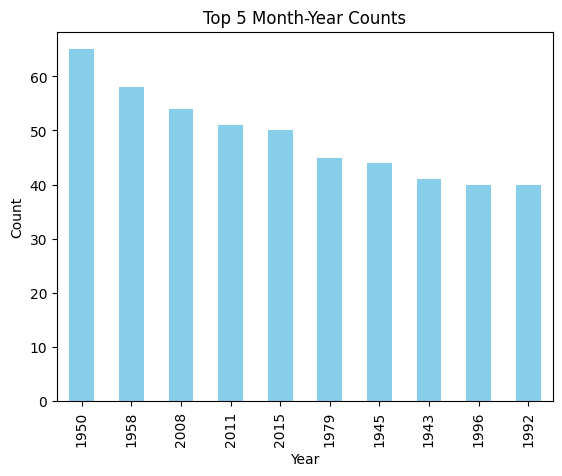

In [36]:
import matplotlib.pyplot as plt

# Count occurrences of each MonthYear
month_year_counts = outlier_values['Year'].value_counts()

# Get the top 5 MonthYear values
top_5_month_year = month_year_counts.head(10)

# Plot the bar chart
top_5_month_year.plot(kind='bar', color='skyblue', title='Top 5 Month-Year Counts')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()